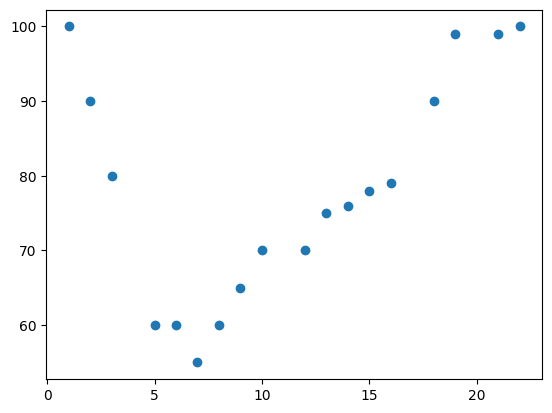

In [2]:
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import mean_squared_error



x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x, y)
plt.show()

### Linear regression
Let's apply a linear regression model on the above dataset

In [5]:
X = np.reshape(np.array(x), (-1,1))
X

array([[ 1],
       [ 2],
       [ 3],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [12],
       [13],
       [14],
       [15],
       [16],
       [18],
       [19],
       [21],
       [22]])

In [8]:
from sklearn.model_selection import train_test_split
linear_regression = LinearRegression()

# write one line code to train the model on the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train)
print(X_test)
print(y_train)
print(y_test)


linear_regression.fit(X_train, y_train)

print(linear_regression.intercept_)
print(linear_regression.coef_)

[[18]
 [ 6]
 [ 3]
 [21]
 [22]
 [12]
 [ 9]
 [16]
 [14]
 [ 5]
 [ 1]
 [ 7]
 [19]
 [15]]
[[ 2]
 [ 8]
 [10]
 [13]]
[90, 60, 80, 99, 100, 70, 65, 79, 76, 60, 100, 55, 99, 78]
[90, 60, 70, 75]
64.62987012987013
[1.22727273]


[[ 1]
 [ 2]
 [ 3]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [12]
 [13]
 [14]
 [15]
 [16]
 [18]
 [19]
 [21]
 [22]]
[67.08441558 74.44805195 76.9025974  80.58441558]
[90 60 70 75]


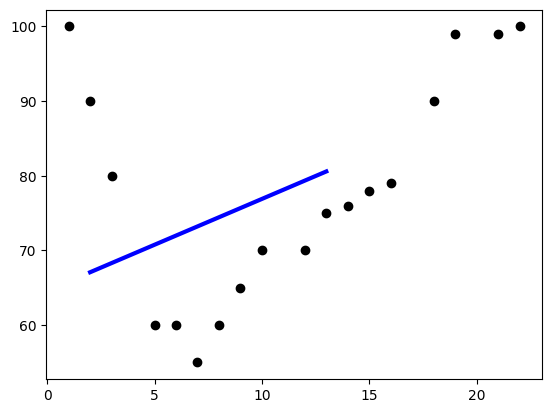

In [17]:
import pandas as pd
# write one line code to predict the dataset by the model
y_predicted = linear_regression.predict(X_test)
y_predicted = np.squeeze(y_predicted)

y_test = np.squeeze(y_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})
df
print(X)
print(y_predicted)
print(y_test)
plt.scatter(X, y, color="black")
plt.plot(X_test, y_predicted, color="blue", linewidth=3)

plt.show()


Is our model underfitting or overfitting? Why?

Let's calculate the MSE to compare with the polynomial regression later.

In [21]:
# Calculate the MSE error, one line code
from sklearn import metrics

mse_linear_model = metrics.mean_squared_error(y_test, y_predicted)

print("Mean squared error: %.2f" % mse_linear_model)

Mean squared error: 203.18


Now, let's try polynomial regression with different degrees

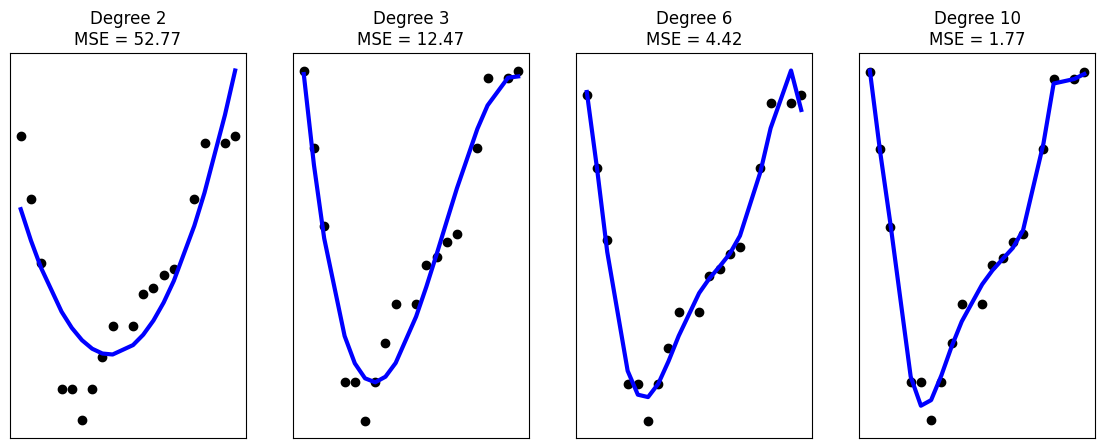

In [25]:
degrees = [2, 3, 6, 10]
plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    degree = degrees[i]
    polynomial_features = PolynomialFeatures(degree=degree)
    linear_regression = LinearRegression()

    # write 2 lines of code to create a pipeline that contains
    #   polynomial_features and linear_regression;
    #   also fit the created pipeline on the X dataset
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

    pipeline.fit(X, y)

    y_predicted_poly2 = pipeline.predict(X)

    # write one line bewlow to calculate the MSE


    mse_error_poly = metrics.mean_squared_error(y, y_predicted_poly2)

    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    plt.scatter(X, y, color="black")
    plt.plot(X, y_predicted_poly2, color="blue", linewidth=3)
    plt.title("Degree {}\nMSE = {:.2f}".format(degree, mse_error_poly))

plt.show()

MSE is decreasing while we increase the number of degrees in PL, but does this mean that we can choose the PL model with the highest number of degrees?